                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.255
Model:                            OLS   Adj. R-squared:                  0.213
Method:                 Least Squares   F-statistic:                     6.156
Date:                Tue, 04 Apr 2023   Prob (F-statistic):             0.0232
Time:                        21:05:45   Log-Likelihood:                -85.985
No. Observations:                  20   AIC:                             176.0
Df Residuals:                      18   BIC:                             178.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.8664     49.439     -0.058      0.9

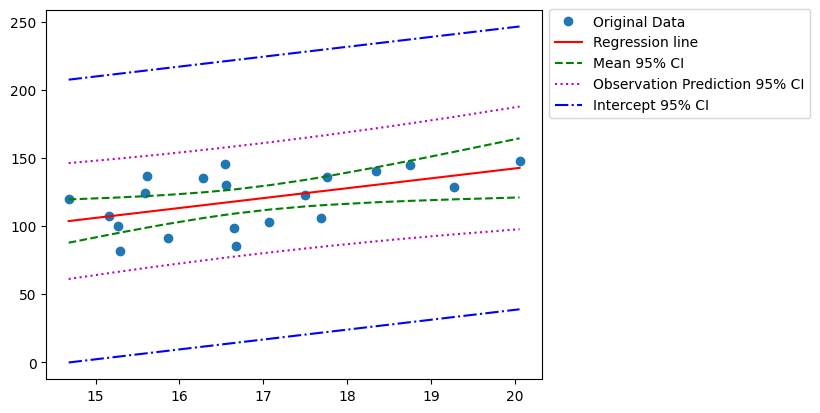


ANOVA results
            df       sum_sq      mean_sq         F  PR(>F)
x          1.0  2171.961419  2171.961419  6.155921  0.0232
Residual  18.0  6350.846052   352.824781       NaN     NaN


In [80]:
import csv
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas
from pprint import pprint

def getStatVals(x, y):
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    Sxx = 0;
    Syy = 0;
    Sxy = 0;
    for i in range(0, len(x)):
        Sxx += (x[i] - x_mean)**2
        Syy += (y[i] - y_mean)**2
        Sxy += (x[i] - x_mean)*(y[i] - y_mean)
    return Sxx, Syy, Sxy

def getCI(x, crit_t, MSE, Sxx):
    x_mean = np.mean(x)
    n = len(x)
    CI = []
    for i in range(0, len(x)):
        conf95 = crit_t*np.sqrt(MSE * ((1/n) + ((x[i] - x_mean)**2)/Sxx))
        CI.append(conf95)
    return CI
    
def getPredictCI(x, crit_t, MSE, Sxx):
    x_mean = np.mean(x)
    n = len(x)
    CI = []
    for i in range(0, len(x)):
        conf95 = crit_t*np.sqrt(MSE * (1 + (1/n) + ((x[i] - x_mean)**2)/Sxx))
        CI.append(conf95)
    return CI
    
# For statistics. Requires statsmodels 5.0 or more
from statsmodels.formula.api import ols
# Analysis of Variance (ANOVA) on linear models
from statsmodels.stats.anova import anova_lm
import statsmodels

#critical t value for dof 18 and 95% two tailed
crit_t =  2.101    
#Use the below command if the directory is incorrect!
#os.chdir(r'C:\Users\uddha\OneDrive\Documents\GitHub\PythonExperiments\Stats')  
carbonateConcentration = []
liqTTA = []
#print(os.getcwd())
try:
    with open('Group_67_Question_2_Data.csv') as csvfile:
        reader = csv.DictReader(csvfile)
        
        for row in reader:
            carbonateConcentration.append(float(row['White Liquor Carbonate']))
            liqTTA.append(float(row['White Liquor TTA']))
except:
    #If you are not sure what your current directory is, use the commented print(os.getcwd()) above in a separated code cell.
    print("You probably haven't selected the right path. Fix os.chdir and ensure it points to the data file!")
else: 
    # Convert the data into a Pandas DataFrame to use the formulas framework
    # in statsmodels
    data = pandas.DataFrame({'x': carbonateConcentration, 'y': liqTTA})

    # Fit the model
    model = ols("y ~ x", data).fit()

    # Print the summary
    print(model.summary())

    # Peform analysis of variance on fitted linear model
    anova_results = anova_lm(model)
    
    offset, coef = model._results.params
    
    y_hat = np.array(carbonateConcentration)*coef + offset;
    MSE_residuals = anova_results.mean_sq[1]
    Sxx, Syy, Sxy = getStatVals(carbonateConcentration, liqTTA)
    CI = getCI(carbonateConcentration, crit_t, MSE_residuals, Sxx)
    predictCI = getPredictCI(carbonateConcentration, crit_t, MSE_residuals, Sxx)
    lowerPredict = y_hat - np.array(predictCI)
    upperPredict = y_hat + np.array(predictCI)
    lower = y_hat - np.array(CI)
    upper = y_hat + np.array(CI)
    
    ax = plt.axes()
    ax.plot(carbonateConcentration, liqTTA, 'o', label='Original Data')
    y_hat.sort()
    carbonateConcentration.sort()
    lower.sort()
    upper.sort()
    lowerPredict.sort()
    upperPredict.sort()
    ax.plot(carbonateConcentration, y_hat, 'r', label='Regression line')
    ax.plot(carbonateConcentration, lower, '--g', label='Mean 95% CI')
    ax.plot(carbonateConcentration, upper, '--g', label='_Mean 95% CI')
    ax.plot(carbonateConcentration, lowerPredict, ':m', label='Observation Prediction 95% CI')
    ax.plot(carbonateConcentration, upperPredict, ':m', label='_Observation Prediction 95% CI')
    Offset95, Coef95 = crit_t*model._results.bse
    
    ax.plot(carbonateConcentration, y_hat + Offset95, '-.b', label='Intercept 95% CI')
    ax.plot(carbonateConcentration, y_hat - Offset95, '-.b', label='_Intercept 95% CI')
    #y_hat = np.array(carbonateConcentration)*(Coef95 + coef) + offset;
    #plt.plot(carbonateConcentration, y_hat, '-.m', label='Gradient 95% CI')
    #y_hat = np.array(carbonateConcentration)*(coef - Coef95) + offset;
    #plt.plot(carbonateConcentration, y_hat, '-.m', label='Gradient 95% CI')

    ax.legend(bbox_to_anchor=(1, 1.02))
    plt.show()
    
    print('\nANOVA results')
    print(anova_results)
    #print(coef, offset, Sxx, Sxy, Syy,np.mean(carbonateConcentration))
    
    
    


    
    